# [Project 2] 지하철 승하차 인원 분석

---

## 프로젝트 목표

- 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 **개찰구 통과 승객 수** 데이터와 **지하철 위치좌표** 데이터를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1. 2021년 6월 승하차 인원만 추출<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1. 호선 별 이용객 수 출력<br>
    3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출<br>
    3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력<br>
    3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합<br>
    3.5. 특정 호선의 혼잡 정도를 지도에 출력<br>

---

## 데이터 출처
- 서울시 지하철 호선별 역별 승하차 인원 정보 데이터: http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

---

## 프로젝트 개요

코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면 혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 `서울시 지하철 호선별 역별 승하차 인원 정보` 데이터를 분석하고 `지하철 역 위치 좌표` 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인해봅시다.

---

## 1. 데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

먼저, 서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 불러와 `metro_all`에 저장합니다.

In [22]:
# pd.read_csv를 통하여 승하차 인원 정보 데이터를 데이터프레임 형태로 읽어옵니다.

# metro_all = pd.read_csv("./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_20210705.csv", encoding = 'cp949')
metro_all = pd.read_csv("./data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_20210705.csv", encoding = 'cp949')

In [17]:
# 승하차 인원 정보 상위 5개 데이터를 출력합니다.
metro_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703


In [14]:
# 승하차 인원 정보 데이터프레임 정보를 요약하여 출력합니다. 
metro_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45338 entries, 0 to 45337
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           45338 non-null  int64 
 1   호선명           45338 non-null  object
 2   지하철역          45338 non-null  object
 3   04시-05시 승차인원  45338 non-null  int64 
 4   04시-05시 하차인원  45338 non-null  int64 
 5   05시-06시 승차인원  45338 non-null  int64 
 6   05시-06시 하차인원  45338 non-null  int64 
 7   06시-07시 승차인원  45338 non-null  int64 
 8   06시-07시 하차인원  45338 non-null  int64 
 9   07시-08시 승차인원  45338 non-null  int64 
 10  07시-08시 하차인원  45338 non-null  int64 
 11  08시-09시 승차인원  45338 non-null  int64 
 12  08시-09시 하차인원  45338 non-null  int64 
 13  09시-10시 승차인원  45338 non-null  int64 
 14  09시-10시 하차인원  45338 non-null  int64 
 15  10시-11시 승차인원  45338 non-null  int64 
 16  10시-11시 하차인원  45338 non-null  int64 
 17  11시-12시 승차인원  45338 non-null  int64 
 18  11시-12시 하차인원  45338 non-null  int64 
 19  12시-

### 1.2. 데이터 확인하기

불러온 두 데이터프레임의 특정 컬럼 데이터를 **중복없이 오름차순 정렬하여** 확인해봅시다.

In [23]:
# metro_all DataFrame 사용월 데이터 확인
sorted(list(set(metro_all['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106]

In [24]:
# metro_all DataFrame 호선명 데이터 확인
sorted(list(set(metro_all['호선명'])))

['1호선',
 '2호선',
 '3호선',
 '4호선',
 '5호선',
 '6호선',
 '7호선',
 '8호선',
 '9호선',
 '9호선2~3단계',
 '9호선2단계',
 '경강선',
 '경부선',
 '경원선',
 '경의선',
 '경인선',
 '경춘선',
 '공항철도 1호선',
 '과천선',
 '분당선',
 '수인선',
 '안산선',
 '우이신설선',
 '일산선',
 '장항선',
 '중앙선']

In [25]:
# DataFrame 지하철역 데이터 확인
sorted(list(set(metro_all['지하철역'])))

['4.19민주묘지',
 '가능',
 '가락시장',
 '가산디지털단지',
 '가양',
 '가오리',
 '가좌',
 '가천대',
 '가평',
 '간석',
 '갈매',
 '강남',
 '강남구청',
 '강동',
 '강동구청',
 '강매',
 '강변',
 '강변(동서울터미널)',
 '강일',
 '강촌',
 '개롱',
 '개봉',
 '개포동',
 '개화',
 '개화산',
 '거여',
 '건대입구',
 '검암',
 '경기광주',
 '경마공원',
 '경복궁',
 '경복궁(정부서울청사)',
 '경찰병원',
 '계양',
 '고덕',
 '고려대',
 '고려대(종암)',
 '고색',
 '고속터미널',
 '고잔',
 '곡산',
 '곤지암',
 '공덕',
 '공릉',
 '공릉(서울과학기술대)',
 '공항시장',
 '공항화물청사',
 '과천',
 '관악',
 '광나루',
 '광나루(장신대)',
 '광명',
 '광명사거리',
 '광운대',
 '광화문',
 '광화문(세종문화회관)',
 '광흥창',
 '광흥창(서강)',
 '교대',
 '교대(법원.검찰청)',
 '구로',
 '구로디지털단지',
 '구룡',
 '구리',
 '구반포',
 '구산',
 '구성',
 '구의',
 '구의(광진구청)',
 '구일',
 '구파발',
 '국수',
 '국회의사당',
 '군자',
 '군자(능동)',
 '군포',
 '굴봉산',
 '굴포천',
 '굽은다리',
 '굽은다리(강동구민회관앞)',
 '금곡',
 '금릉',
 '금정',
 '금천구청',
 '금촌',
 '금호',
 '기흥',
 '길동',
 '길음',
 '김유정',
 '김포공항',
 '까치산',
 '까치울',
 '낙성대',
 '낙성대(강감찬)',
 '남구로',
 '남동인더스파크',
 '남부터미널',
 '남부터미널(예술의전당)',
 '남성',
 '남영',
 '남춘천',
 '남태령',
 '남한산성입구',
 '남한산성입구(성남법원.검찰청)',
 '내방',
 '노들',
 '노량진',
 '노원',
 '녹번',
 '녹사평(용산구청)',
 '녹양',
 '녹천',
 '논현',

In [26]:
# DataFrame 지하철역 데이터 개수 확인
len(list(set(metro_all['지하철역'])))

579

--- 

## 2. 데이터 정제

데이터를 확인해보니 2015년 1월부터 2021년 6월까지 수집된 데이터인 것을 알 수 있습니다.

이번 프로젝트에서는 **가장 최근 한달간 수집된 데이터**를 기준으로 특정 호선에서 어떤 역이 가장 혼잡한지 확인하고자 합니다.

### 2.1. 2021년 6월 승하차 인원만 추출

수집된 데이터 중 가장 최근인 6월에 수집한 데이터만 추출하고 불필요한 컬럼을 제거해봅시다.

In [27]:
# 2021년 6월 총 승객수만 추출
metro_recent = metro_all[metro_all['사용월']==202106]
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,8211,16,1434,1,1,0,0,0,0,20210703
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,2589,4,1348,0,0,0,0,0,0,20210703
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,8024,30,637,0,1,0,0,0,0,20210703
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,1485,3,92,0,0,0,0,0,0,20210703
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,5451,10,449,0,0,0,0,0,0,20210703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,...,219,1,61,0,0,0,0,0,0,20210703
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,4161,9,273,0,0,0,0,0,0,20210703
605,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,20210703
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,251,0,0,0,0,0,0,0,0,20210703


In [28]:
# 불필요한 작업일자 컬럼 제거
metro_recent = metro_recent.drop(columns={'작업일자'})
metro_recent

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202106,1호선,동대문,715,14,13235,2131,8936,6979,14776,...,2811,8211,16,1434,1,1,0,0,0,0
1,202106,1호선,동묘앞,51,1,3218,1100,3422,4802,5896,...,1035,2589,4,1348,0,0,0,0,0,0
2,202106,1호선,서울역,654,17,9008,6400,12474,37203,37253,...,11581,8024,30,637,0,1,0,0,0,0
3,202106,1호선,시청,37,0,1881,4340,2948,21443,6280,...,4390,1485,3,92,0,0,0,0,0,0
4,202106,1호선,신설동,343,3,8150,3192,8131,10929,17021,...,1952,5451,10,449,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,202106,중앙선,원덕,47,1,350,7,653,225,882,...,2,219,1,61,0,0,0,0,0,0
604,202106,중앙선,중랑,160,1,6077,564,9670,2216,22839,...,640,4161,9,273,0,0,0,0,0,0
605,202106,중앙선,지평,0,0,0,0,1,0,377,...,0,0,0,0,0,0,0,0,0,0
606,202106,중앙선,팔당,2,1,267,132,722,675,1546,...,178,251,0,0,0,0,0,0,0,0


---

## 3. 데이터 시각화

2021년 6월 데이터만 추출한 `metro_recent`를 활용하여 다양한 데이터 시각화 및 혼잡도 분석을 진행해봅시다.

### 3.1. 호선 별 이용객 수 출력

추출한 `metro_recent` 데이터를 활용해 이용객 수가 가장 많은 호선 순으로 막대그래프를 출력해 보겠습니다.

In [29]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

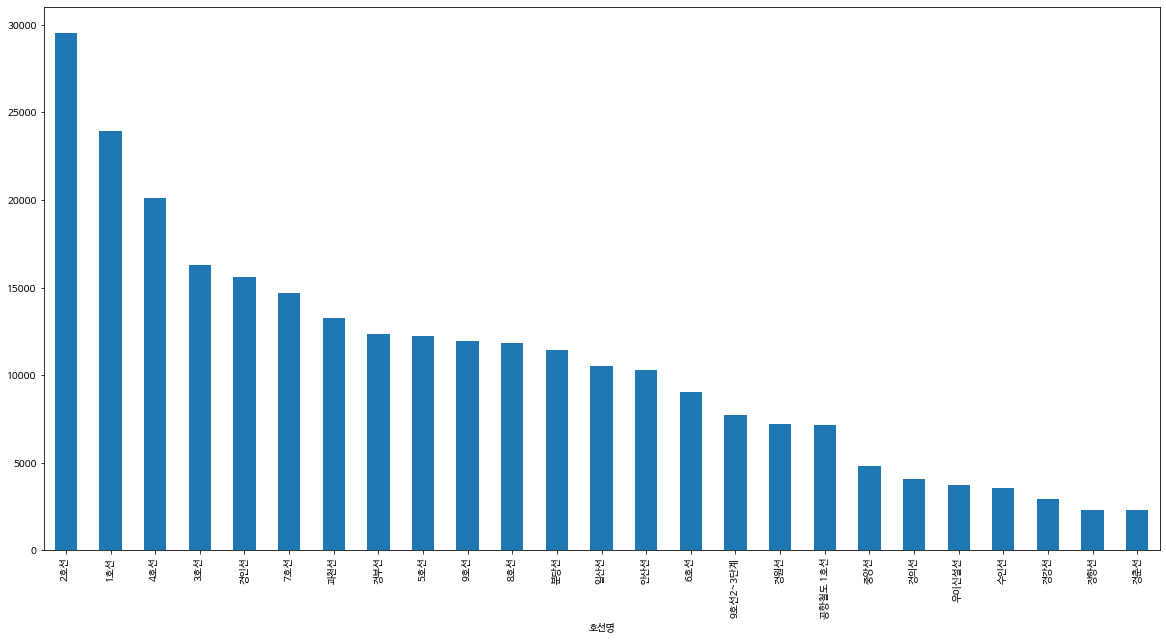

In [30]:
metro_line = metro_recent.groupby(['호선명']).mean().reset_index()
metro_line = metro_line.drop(columns='사용월').set_index('호선명')
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

metro_line.plot(kind=('bar'))
plt.show()

### 3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출

다양한 호선에서 역별 평균 승하차 인원이 많은 역은 어디일까요? 이용객이 가장 많은 2호선 기준으로 확인해봅시다.

In [31]:
line = '2호선'
metro_st = metro_recent.groupby(['호선명','지하철역']).mean().reset_index()
metro_st_line2 = metro_st[metro_st['호선명']==line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202106,68,5,5634,10898,15798,49800,37686,...,27475,13686,7,5,0,0,0,0,0,0
11,2호선,강변(동서울터미널),202106,18,0,8295,2136,27343,21465,77995,...,5206,14835,4,403,1,0,0,0,0,0
12,2호선,건대입구,202106,176,7,14205,2139,20389,19701,52326,...,11703,22174,15,2442,0,0,0,0,0,0
13,2호선,교대(법원.검찰청),202106,18,1,2366,6923,11842,25344,24154,...,7841,8012,3,55,0,0,0,0,0,0
14,2호선,구로디지털단지,202106,285,6,40159,5663,52880,22522,134048,...,7902,36652,0,34,1,1,0,0,0,0
15,2호선,구의(광진구청),202106,50,1,13662,1149,25627,9640,66711,...,4342,16515,6,1038,0,0,0,0,0,0
16,2호선,낙성대(강감찬),202106,56,0,11657,1942,26007,8488,77510,...,4231,22418,6,1409,0,0,0,0,0,0
17,2호선,당산,202106,44,4,6576,3109,17276,12432,45774,...,4488,13350,1,205,0,0,0,0,0,0
18,2호선,대림(구로구청),202106,412,20,34772,3267,29903,11601,65255,...,3662,17529,2,305,1,0,0,0,0,0
19,2호선,도림천,202106,0,0,263,320,1272,833,3182,...,151,669,3,50,0,0,0,0,0,0


In [56]:
# # 승차 인원 컬럼만 추출
# metro_get_on = pd.DataFrame()
# metro_get_on['지하철역'] = metro_st_line2['지하철역']
# for i in range(int((len(metro_recent.columns)-3)/2)):
#     metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
# metro_get_on = metro_get_on.set_index('지하철역')
# metro_get_on

metro_get_on = metro_st_line2.iloc[:, [1] + list(range(3, 51, 2))]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,68,5634,15798,37686,60412,47444,47162,63593,80198,96731,...,333597,202589,156402,212344,209363,27475,7,0,0,0
강변(동서울터미널),18,8295,27343,77995,106012,72448,50860,45540,45801,43734,...,58456,41062,30584,26850,20304,5206,4,1,0,0
건대입구,176,14205,20389,52326,88094,58146,33837,31591,36562,39017,...,79285,56745,57426,82927,81501,11703,15,0,0,0
교대(법원.검찰청),18,2366,11842,24154,33988,26824,25349,30985,34406,40404,...,146869,64550,49050,58044,53655,7841,3,0,0,0
구로디지털단지,285,40159,52880,134048,183174,109828,60920,54690,59463,61034,...,236175,109183,61807,56760,49254,7902,0,1,0,0
구의(광진구청),50,13662,25627,66711,111827,62341,32099,26917,27514,26932,...,41165,20148,15673,16519,15886,4342,6,0,0,0
낙성대(강감찬),56,11657,26007,77510,125167,76944,39332,33589,35687,34536,...,46497,26218,20440,20718,17056,4231,6,0,0,0
당산,44,6576,17276,45774,55760,31967,21461,20442,21169,21111,...,60343,26398,19514,22644,21194,4488,1,0,0,0
대림(구로구청),412,34772,29903,65255,91050,61110,33297,27642,30079,29912,...,52957,26990,18925,16643,12799,3662,2,1,0,0


In [57]:
# # 하차 인원 컬럼만 추출
# metro_get_off = pd.DataFrame()
# metro_get_off['지하철역'] = metro_st_line2['지하철역']
# for i in range(int((len(metro_recent.columns)-3)/2)):
#     metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
# metro_get_off = metro_get_off.set_index('지하철역')
# metro_get_off

metro_get_off = metro_st_line2.iloc[:, [1] + list(range(4, 51, 2))]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5,10898,49800,150575,319617,310538,146907,104498,102420,121091,...,182063,99888,43968,35446,37493,13686,5,0,0,0
강변(동서울터미널),0,2136,21465,24424,46063,36699,34309,31714,35111,39567,...,108021,74801,47900,40695,48963,14835,403,0,0,0
건대입구,7,2139,19701,26069,61058,47220,36298,37929,46292,52863,...,144916,94289,49337,45034,50847,22174,2442,0,0,0
교대(법원.검찰청),1,6923,25344,58254,157982,137549,66113,51410,46562,53373,...,67556,40034,21605,19337,22696,8012,55,0,0,0
구로디지털단지,6,5663,22522,85822,268761,152613,57973,43450,44629,51260,...,162836,125661,76419,75719,89412,36652,34,1,0,0
구의(광진구청),1,1149,9640,15389,39614,22182,18572,18261,20806,23563,...,90738,64759,40868,38952,44587,16515,1038,0,0,0
낙성대(강감찬),0,1942,8488,20099,38509,30811,23826,21550,24991,25891,...,95878,81237,50982,49182,62294,22418,1409,0,0,0
당산,4,3109,12432,29933,78083,37339,18344,16913,18874,21079,...,73469,48000,29505,29942,33814,13350,205,0,0,0
대림(구로구청),20,3267,11601,24681,56423,34946,28143,28225,27936,29486,...,72361,52134,34930,44849,50327,17529,305,0,0,0


In [58]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,92076,90468
강변(동서울터미널),34935,34220
건대입구,39514,42484
교대(법원.검찰청),35937,40503
구로디지털단지,66141,66032
구의(광진구청),25803,25432
낙성대(강감찬),30847,29808
당산,21019,24151
대림(구로구청),27800,28518


### 3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력

2호선 기준 6월 한 달간 **강남 > 잠실 > 신림 > 구로디지털단지 > 홍대입구 > 선릉** 순으로 평균 승차 인원이 많았습니다.

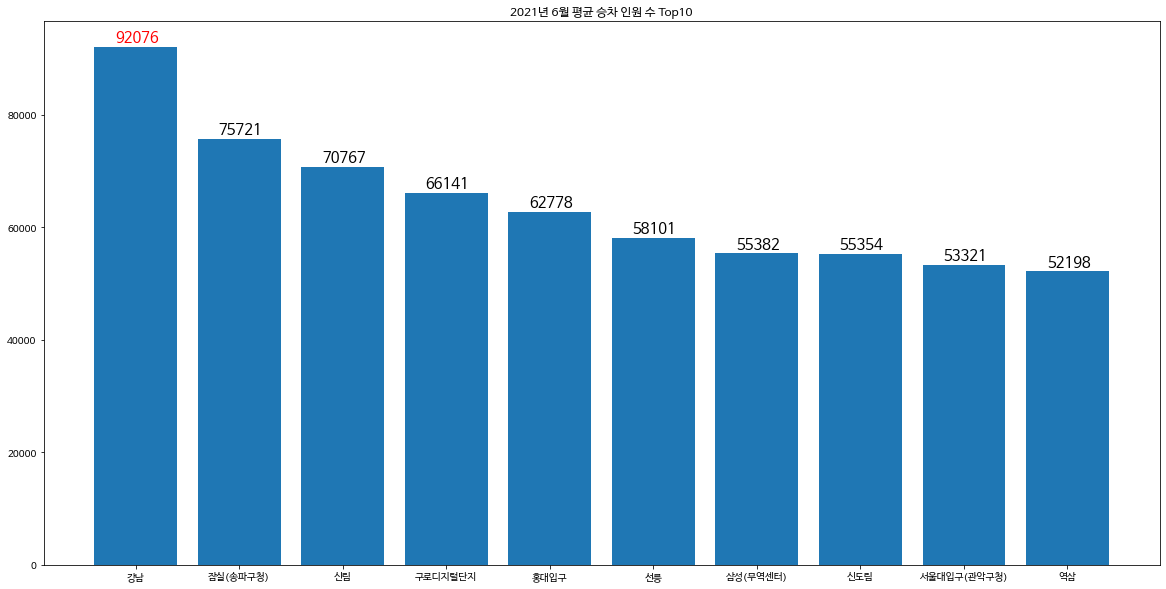

In [75]:
# 승차 인원 수 Top10 
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.2, y+1000), size = 15, color = 'red')
    else:
        plt.annotate(y, (x-0.2, y+1000), size = 15)

plt.title('2021년 6월 평균 승차 인원 수 Top10')
plt.show()

평균 하차 인원은 거의 동일하게 **강남 > 잠실 > 신림 > 구로디지털단지 > 홍대입구 > 역삼** 순으로 많았습니다.

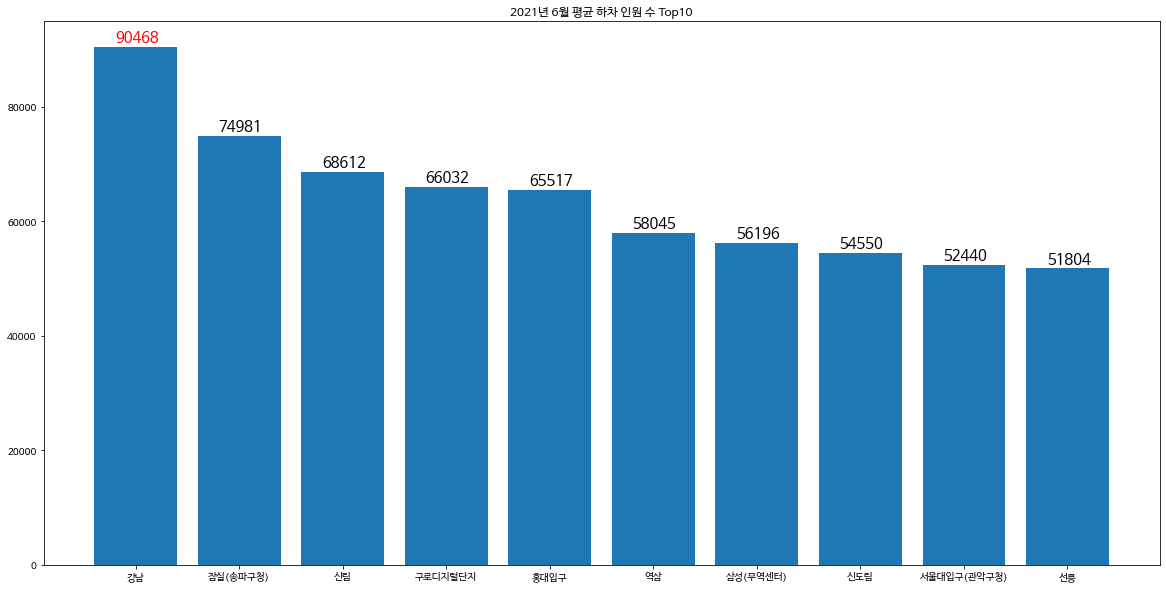

In [76]:
# 하차 인원 수 Top10
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family="NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.2, y+1000), size = 15, color = 'red')
    else:
        plt.annotate(y, (x-0.2, y+1000), size = 15)

plt.title('2021년 6월 평균 하차 인원 수 Top10')
plt.show()

**퀴즈1. 6호선의 지하철 역 중에서 승차 인원수가 가장 많은 역명을 구하세요.**

In [87]:
# 3.2.의 첫 번째 셀에서 line값만 수정한 후 
# 3.2.와 3.3. 코드를 순서대로 다시 실행해보면 답을 구할 수 있습니다.
metro_st_line6 = metro_st[metro_st['호선명']=="6호선"]

metro_get_on = metro_st_line6.iloc[:, [1] + list(range(3, 51, 2))]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_off = metro_st_line6.iloc[:, [1] + list(range(4, 51, 2))]
metro_get_off = metro_get_off.set_index('지하철역')

df = pd.DataFrame(index = metro_st_line6['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df
top1_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(1)
top1_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(1)
top1_on

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
공덕,19783,19001


In [86]:
top1_off

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
응암,19781,19512


In [91]:
# 6호선 지하철 역 중 승차 인원 수가 가장 많은 역명을 quiz_1 변수에 저장합니다.
# '~~역'에서 역을 제외한 ~~을 문자형으로 저장합니다.
quiz_1 = top1_on.index[0]
quiz_1

'공덕'

### 3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합

특정 호선의 지하철 역 마다 지도에 정보를 출력하기 위해서는 각 위치의 좌표정보가 필요합니다.

이를 해결하기 위해 카카오 API를 활용하여 csv 파일로 만들어두었습니다.

출처: <br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword<br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [92]:
# 지하철 역별 위치좌표에 대한 데이터를 불러옵니다.
subway_location = pd.read_csv('./data/지하철 역 위치 좌표.csv')
subway_location

,지하철역,주소,x좌표,y좌표
0,4.19민주묘지역,서울 강북구 우이동 72-182,37.649457,127.013506
1,가능역,경기 의정부시 가능동 197-1,37.747906,127.044358
2,가락시장역,서울 송파구 가락동 184-23,37.492915,127.118215
3,가산디지털단지역,서울 금천구 가산동 468-4,37.482414,126.882240
4,가양역,서울 강서구 가양동 14-61,37.561758,126.853997
...,...,...,...,...
574,회룡역,경기 의정부시 호원동 50-5,37.713908,127.046619
575,회현역,서울 중구 남창동 64-1,37.557688,126.976720
576,회현역,서울 중구 남창동 64-1,37.557688,126.976720
577,효창공원앞역,서울 용산구 효창동 80,37.539622,126.960984


먼저 특정 호선의 역별 평균 승하차 인원 수와 지하철 역별 위치좌표 데이터를 병합하여 데이터프레임을 생성해봅시다.

In [93]:
# 특정 호선의 역별 평균 승하차 인원 수와 지하철 역 위치 좌표를 데이터프레임으로 반환하는 함수입니다.
def get_nums_and_location(line, metro_st):
    
    # 특정 호선의 데이터만 추출합니다.
    metro_line_n = metro_st[metro_st['호선명']==line]
    
    # 승차 인원 컬럼만 추출합니다.
    metro_get_on = pd.DataFrame()
    metro_get_on['지하철역'] = metro_line_n['지하철역']
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_on[metro_line_n.columns[3+2*i]] = metro_line_n[metro_line_n.columns[3+2*i]]
    metro_get_on = metro_get_on.set_index('지하철역')
    
    # 하차 인원 컬럼만 추출합니다.
    metro_get_off = pd.DataFrame()
    metro_get_off['지하철역'] = metro_line_n['지하철역']
    for i in range(int((len(metro_recent.columns)-3)/2)):
        metro_get_off[metro_line_n.columns[4+2*i]] = metro_line_n[metro_line_n.columns[4+2*i]]
    metro_get_off = metro_get_off.set_index('지하철역')
    
    # 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장합니다.
    df = pd.DataFrame(index = metro_line_n['지하철역'])
    df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
    df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
    
    # 지하철역 명 동일하도록 설정합니다.
    temp = []
    df = df.reset_index()
    for name in df['지하철역']:
        temp.append(name.split('(')[0]+'역')
    df['지하철역'] = temp
    
    # 지하철역 명을 기준으로 두 데이터프레임 병합합니다.
    df = df.merge(subway_location, left_on='지하철역', right_on='지하철역')
    return df

In [94]:
get_nums_and_location('6호선', metro_st)

,지하철역,평균 승차 인원 수,평균 하차 인원 수,주소,x좌표,y좌표
0,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
1,고려대역,8761,8350,서울 성북구 종암동 29-18,37.589679,127.035926
2,공덕역,19783,19001,서울 마포구 공덕동 423-29,37.544487,126.951195
3,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
4,광흥창역,9772,9385,서울 마포구 창전동 145-17,37.547426,126.932477
5,구산역,8504,6408,서울 은평구 구산동 1,37.611212,126.917182
6,녹사평역,5997,5918,서울 용산구 용산동4가 4,37.534446,126.985525
7,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
8,대흥역,8862,9121,서울 마포구 대흥동 128-1,37.547730,126.942379
9,독바위역,3167,3376,서울 은평구 불광동 13-33,37.618377,126.932857


### 3.5. 특정 호선의 혼잡 정도를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [95]:
import folium

# 특정 위도, 경도 중심으로 하는 OpenStreetMap을 출력
map_osm = folium.Map(location = [37.529622, 126.984307], zoom_start=12)
map_osm

이제 특정 호선의 역별 평균 승차 인원 수를 원형마커를 통해 지도에 출력해봅시다.

In [96]:
# 특정 호선의 역별 평균 승하차 인원 수와 위치좌표 데이터만 추출합니다.
rail = '6호선'
df = get_nums_and_location(rail, metro_st)

# 서울의 중심에 위치하는 명동역의 위도와 경도를 중심으로 지도 출력합니다.
latitude = subway_location[subway_location['지하철역']=='명동역']['x좌표']
longitude = subway_location[subway_location['지하철역']=='명동역']['y좌표']
map_osm = folium.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철 역의 위치별로 원형마커를 지도에 추가합니다.
for i in df.index:
    marker = folium.CircleMarker([df['x좌표'][i],df['y좌표'][i]],
                        radius = (df['평균 승차 인원 수'][i]+1)/3000, # 인원 수가 0일 때 계산오류 보정
                        popup = [df['지하철역'][i],df['평균 승차 인원 수'][i]], 
                        color = 'blue', 
                        fill_color = 'blue')
    marker.add_to(map_osm)

map_osm

**퀴즈2. 강남역의 x좌표(위도)를 구하세요.**

In [99]:
# get_nums_and_location() 함수를 활용하면 쉽게 구할 수 있습니다.
# 강남역은 2호선이기 때문에 df = get_nums_and_location('2호선', metro_st)으로 데이터프레임을 추출합니다.
# df[df['지하철역']=='강남역']['x좌표']을 통해 컬럼 '지하철역'이 '강남역'인 행을 추출하고 'x좌표'값을 구해보세요.
df = get_nums_and_location('2호선', metro_st)



37.4970572543978

In [100]:
# float형으로 좌표값만 저장합니다. 예시: 37.123456
quiz_2 = df[df['지하철역']=='강남역']['x좌표'][0]
quiz_2

37.4970572543978

---